# Executive Summary


This report describes the results of a detailed analysis of the historical records of the sales, marketing strategies and external events recorded over a two-year period for an unknown company. Our analysis shows that there is a **huge potential for optimizing the company's advertising spending plan**. We make the following recommendations to the Chief Marketing Officer:

1) Reduce the advertising budget to \$50 million (49% of the original budget).

2) Invest this budget only on media initiavives 4, 9 and 14, which we find are the only ones that clearly drive up sales.

3) Focus on structural occurrences (1,2,5,7,9,10) which are found to increase sales and, at the same time, try to minimize the remaining ones, since these affect sales negatively. 

If one implements the above suggestions, our model predicts that the CMO will be able to **save $52 million on advertising** (~10% of the total revenue) while **increasing sales significantly** (possibly by several \$100 million). The details of this analysis and possible limitations are reported and discussed below.

## Key findings

In this document we report detailed analysis and modeling of the provided data. Here we summarize the key results of this analysis. An interested reader can then proceed and read more details below.

1) This company is **spending 18% of their revenue in advertising** (\$ 102 million out of a \$557 million revenue). While advertising spending depends strongly on the type of industry and the market, 18% is definitely on the high side (see [here](http://smallbusiness.chron.com/percentage-gross-revenue-should-used-marketing-advertising-55928.html)). So we wonder if **this company is spending too much in advertising**.

2) There is a **huge variability in the effectiveness of different media initiatives**. Indeed, while a few initiatives (4, 9 & 14) clearly drive up sales (with ROIs larger than 9), all the other ones have no effect on them. Dropping those uneffective initiatives would save about 88% of the adervtising budget.

3) Vert little money is invested in those initiatives that actually significantly drive up sales . Threfeore, there is a great opportunity to optimize the spending plan and **both reduce advertising spending and increase sales.**

4) Six of the studied structural occurrences were found to increase weekly sales (we dub them positive structural occurrences) while the remaining four were found to decrease sales (negative structural occurrences). The effect was significant in certain cases (up to 20%). Further work is necessary to see how one can use positive structural occurrences to their advantage and minimize the effect of negative structural occurrences.

# Data Analysis

Below we use standard python tools for data science. These include pandas libraries for data wrangling, statistical libraries for data analysis and plotting libraries to visualize the results.

In [2]:
%pylab inline
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa as tsa
import statsmodels.formula.api as smf
from scipy import stats

observations = pd.DataFrame.from_csv('./observations.csv', index_col=None)
spend = pd.DataFrame.from_csv('./spend_values.csv', index_col=None)



Populating the interactive namespace from numpy and matplotlib


## The idea

In what follows we want to see if and how a certain media initiative is affecting sales. In order to do that, we plot the weekly sales vs the number of media impressions in that week. The key idea is that, if the media campaign is working, then **the more impressions there are in a week, the higher the sales**. In statistical language, people say that there is a positive correlation between these two variables. This is often called Marketing Mixed Modeling (MMM), see [here](http://www.andrewwalterowens.com/post/111019666926/marketing-mix-modeling-using-statsmodels-part-1).

Below we perform this type of analysis by fitting a straight line to the data and looking at the slope of that line. If the slope is positive and large, then the media campaign is working. If the slope is zero, then it means it has no effect on sales. If it is negative, then the media campaign is reducing sales. We also focus on the p-value obtained from the linear fit. Low p-values (< 0.05) mean that indeed there is a correlation; larger p-value imply that the data does not show a statically meaninful trend, even if the estimated slope is $\neq 0$.

In [18]:
# Performing a simple time-series analysis
 
for i in range(1,21):
    
    name  = 'Media ' + str(i) + ' Impressions'

    x = observations[name]
    y = observations['Sales']
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    if p_value < 0.05:
        print(name)
        print(slope, p_value)


Media 4 Impressions
(0.94844273769339082, 0.0024921889321075207)
Media 9 Impressions
(1.1155098752792703, 9.2639306094687362e-05)
Media 14 Impressions
(1.1173720894054608, 5.657327783174512e-05)


## Only three media initiatives have a positive effect on sales.

Based on the above analysis, only three initiatives show a statistically meaningful positive correlation between the number of impressions and sales. In other words, there is no statistical evidence that most of the initiatives increase sales. Based on this analysis, one could continue  only inititives 4, 9 and 14, discontinue all the others and **save \$89 million**, which corresponds to 88% of the advertising budget and about 15% of the total revenue.

We note that the slopes calculated tell how much one media impression increases sales. In the cases of media 4, 9 and 14, one impression increases sales by \$0.95, \$1.11 and \$1.11, respectively.

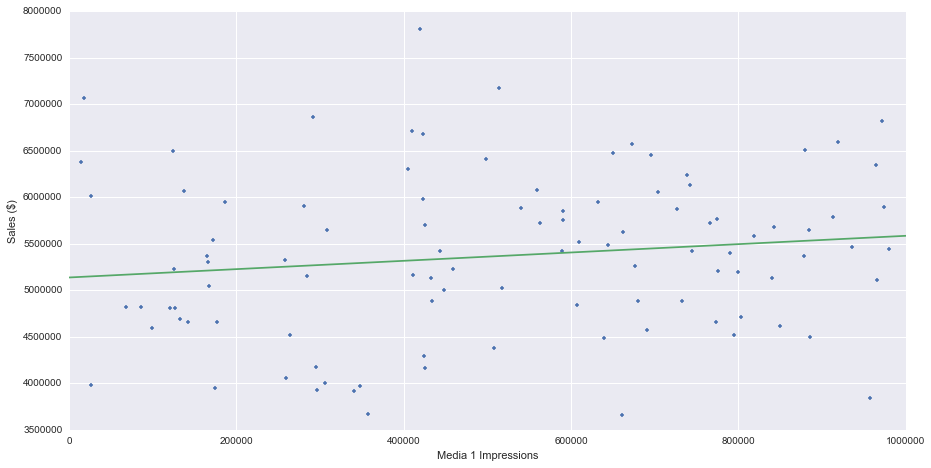

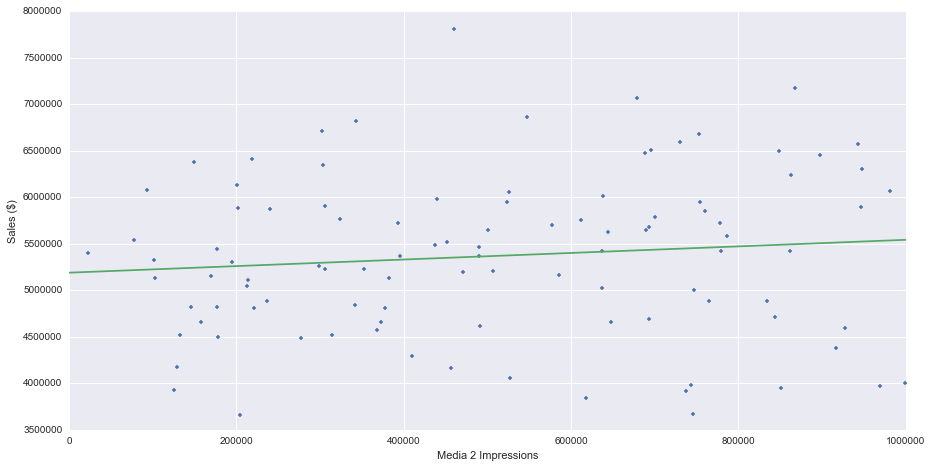

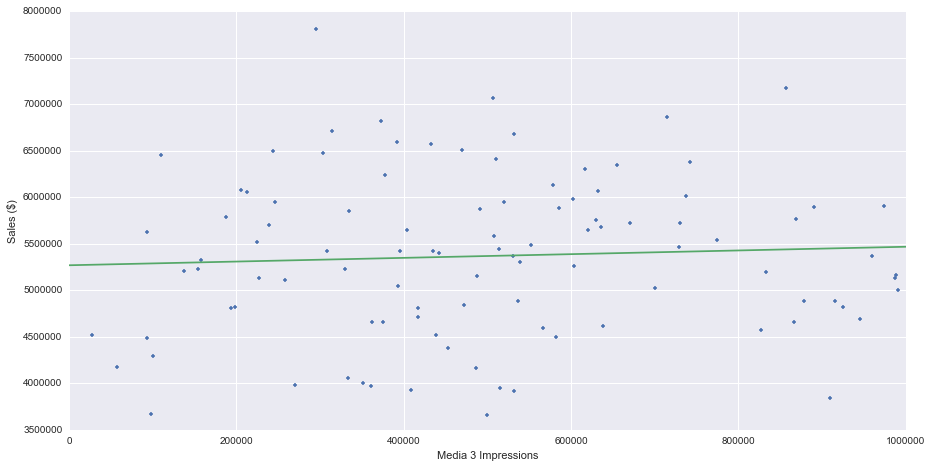

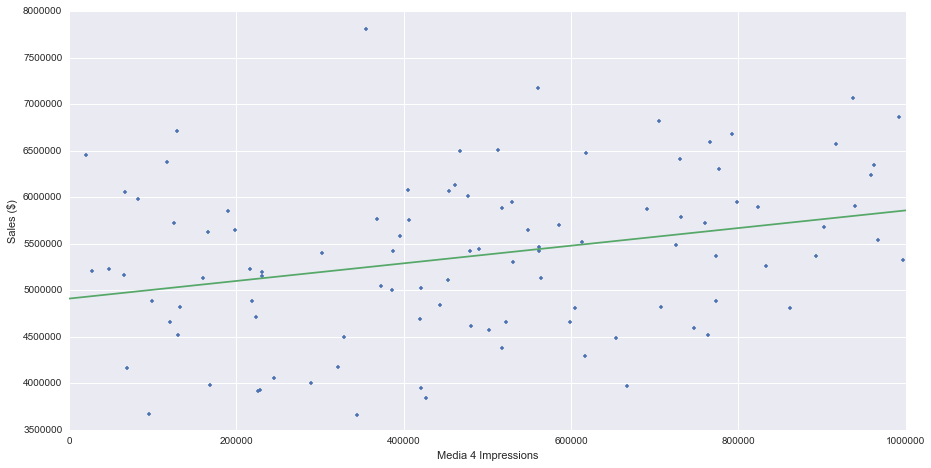

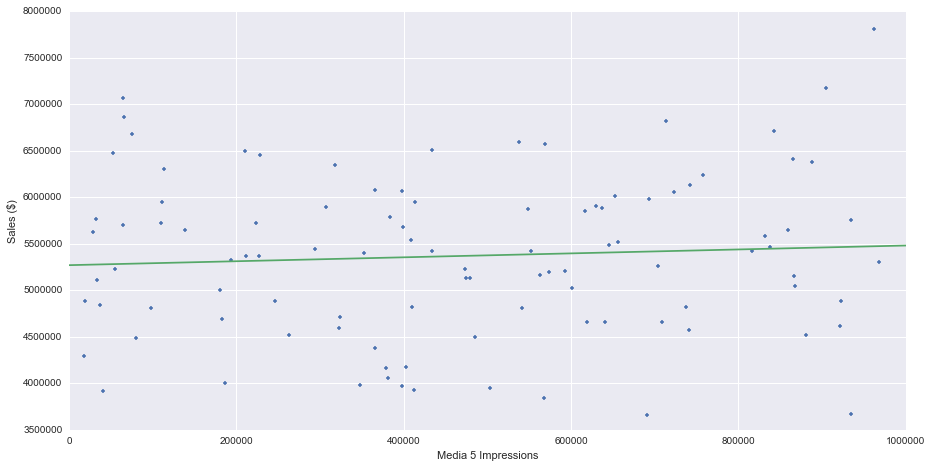

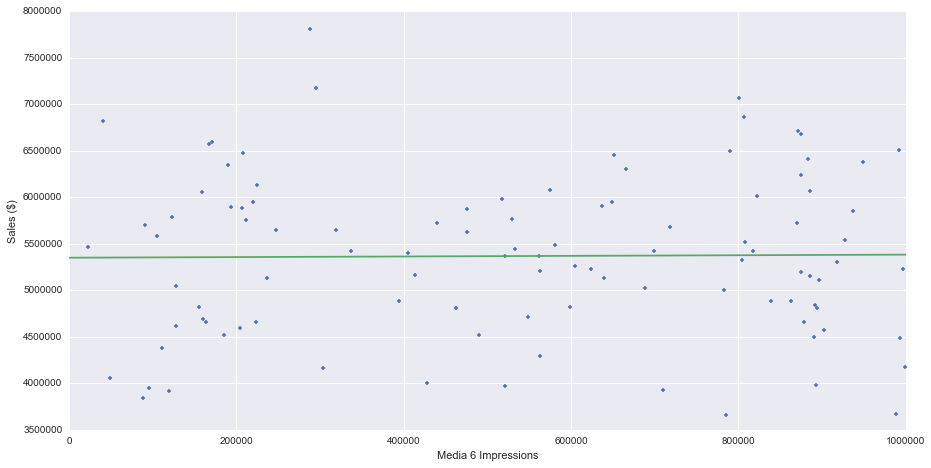

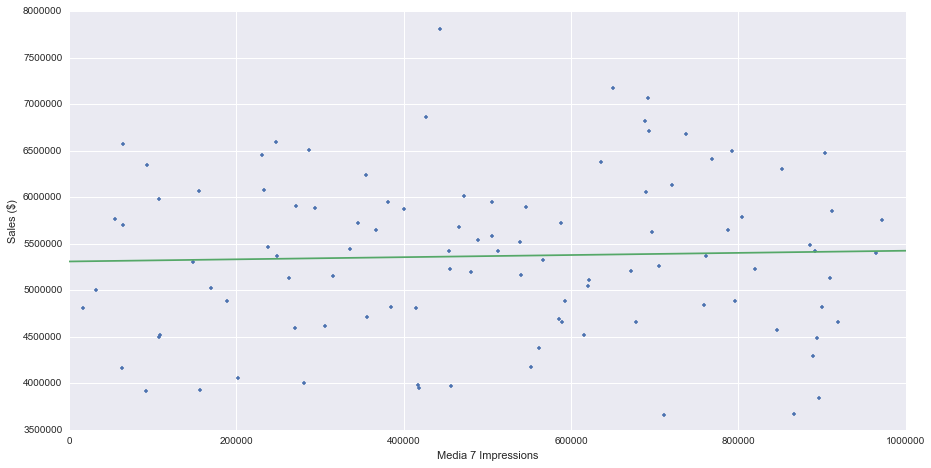

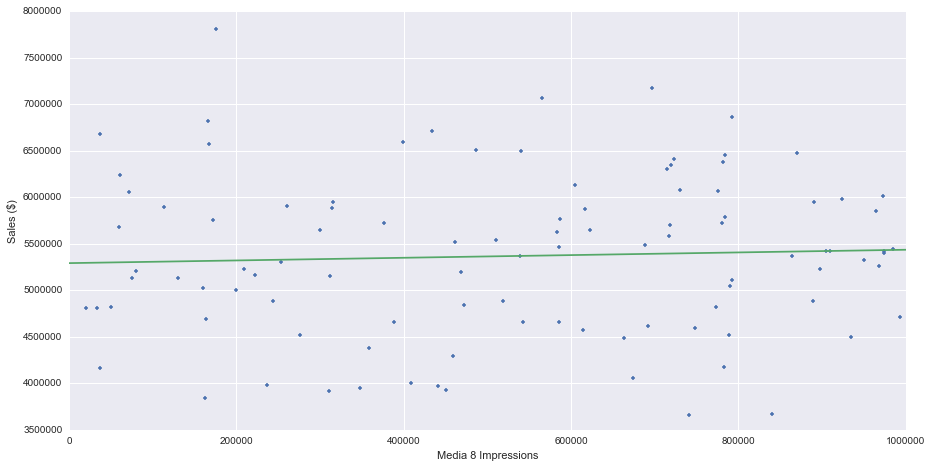

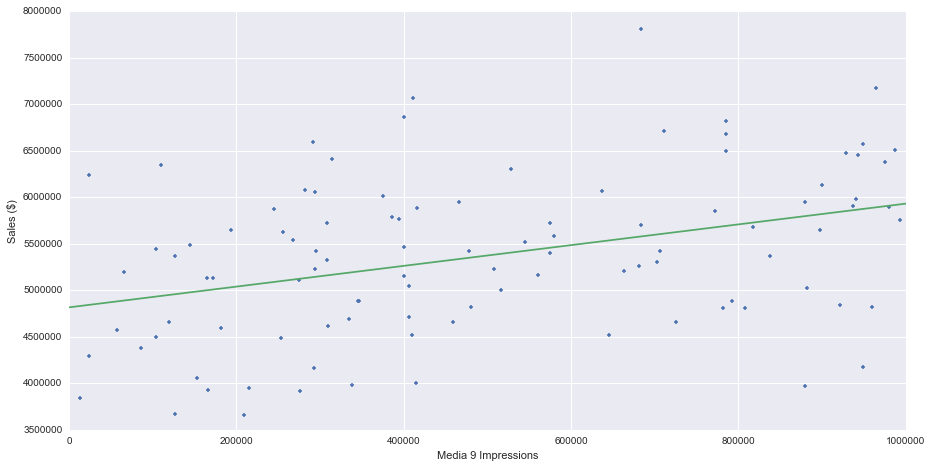

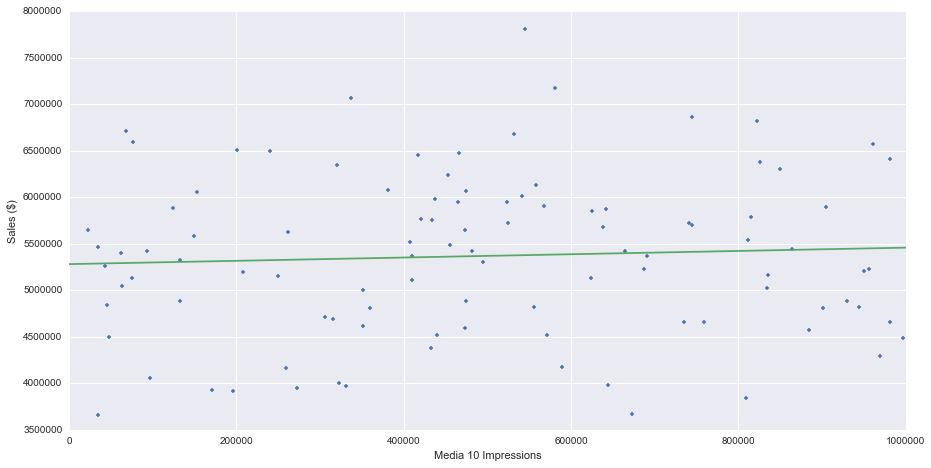

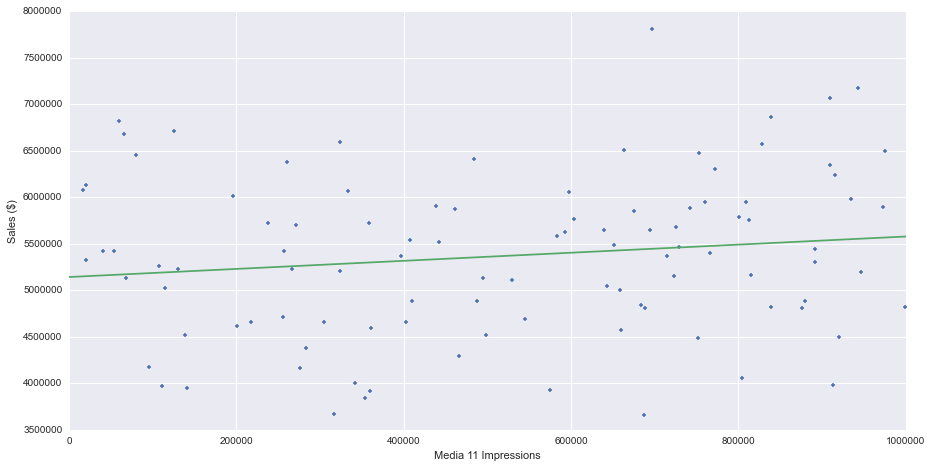

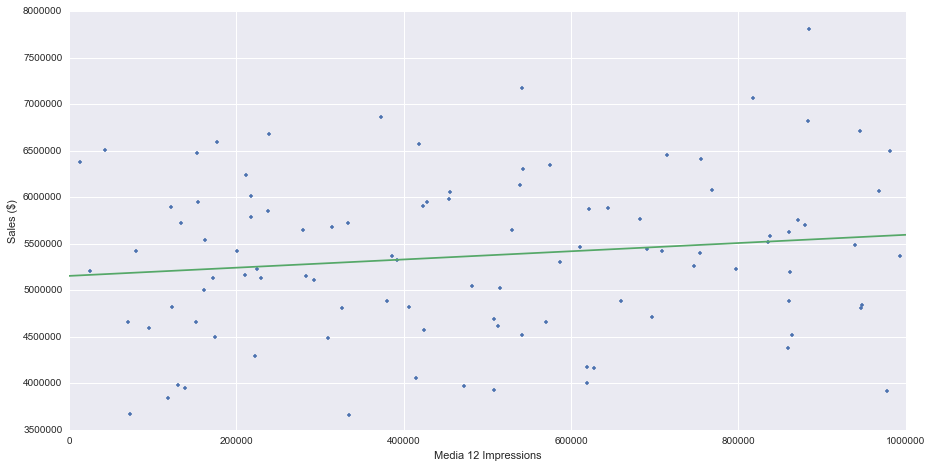

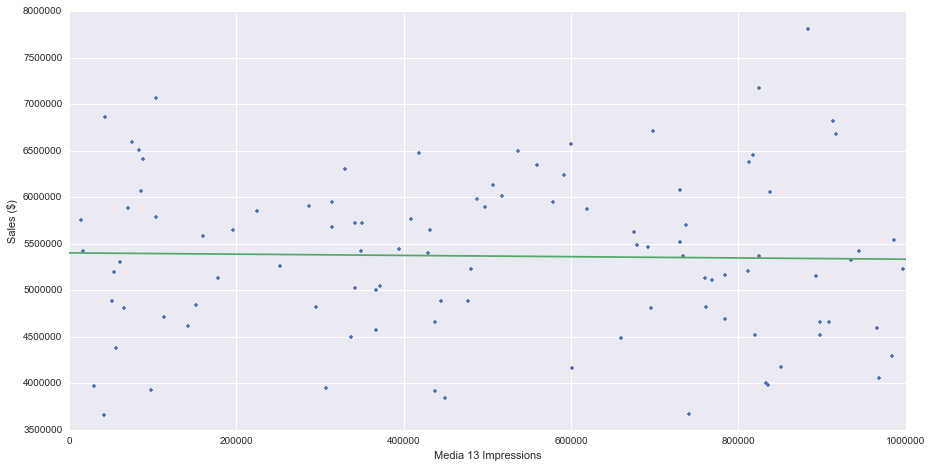

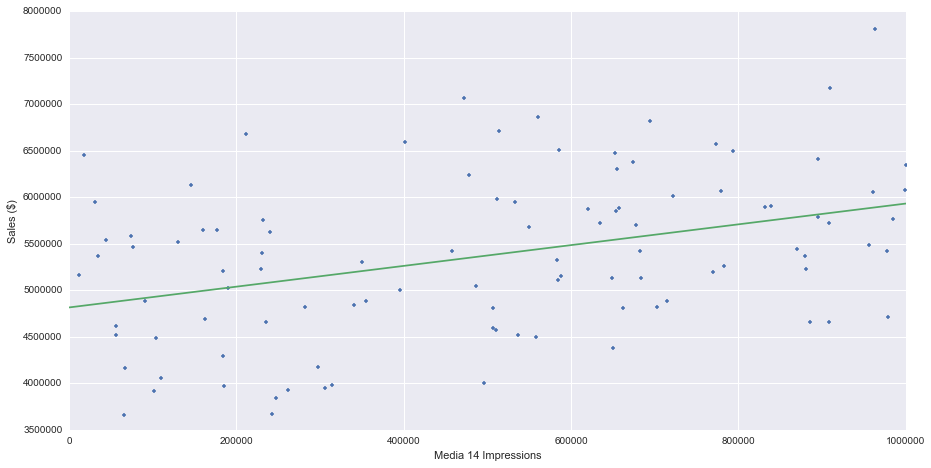

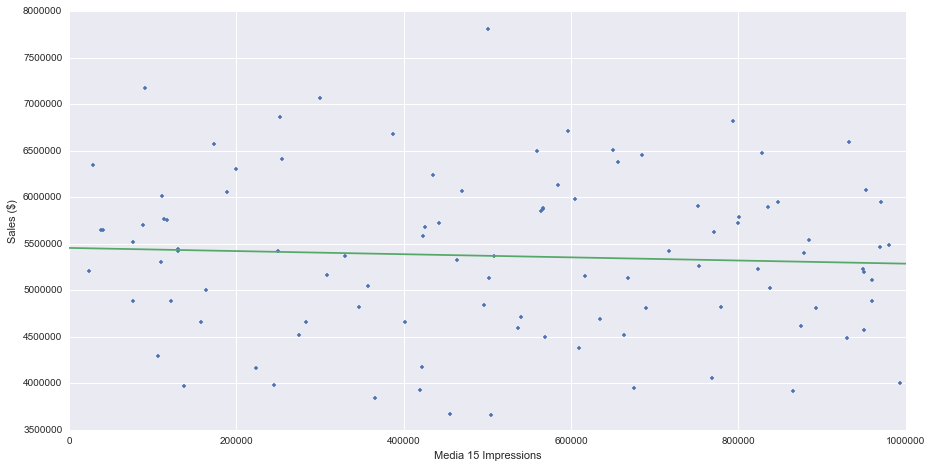

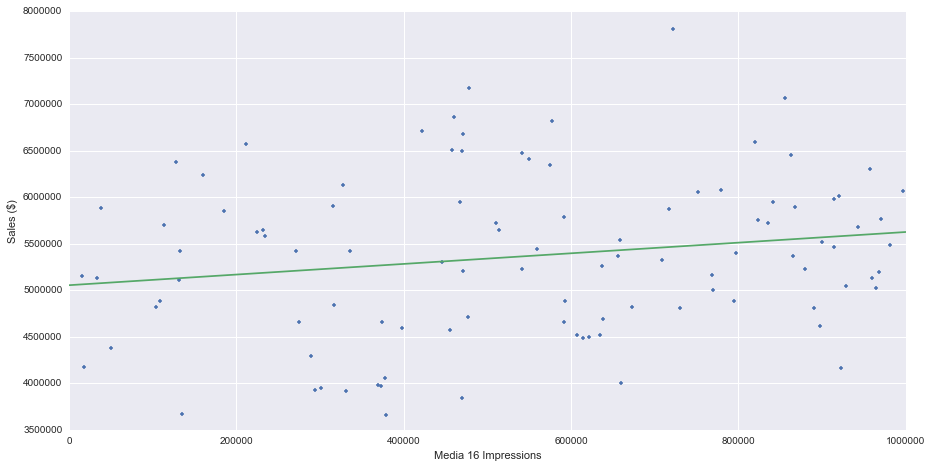

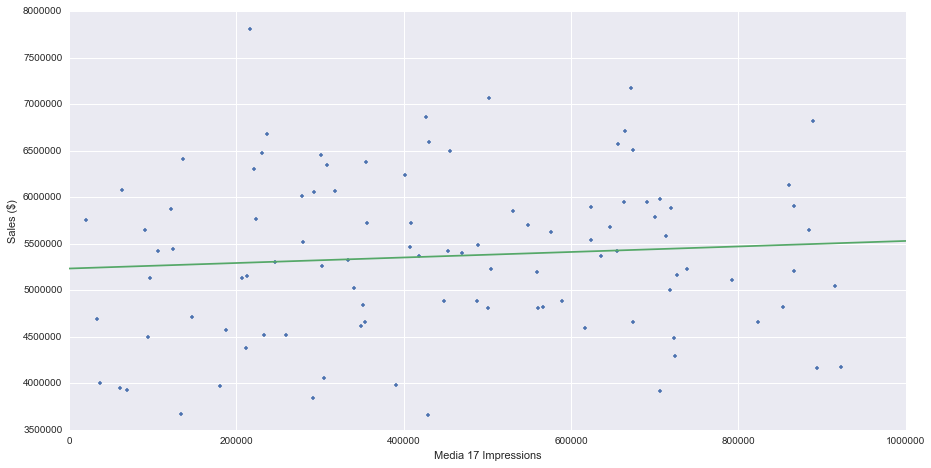

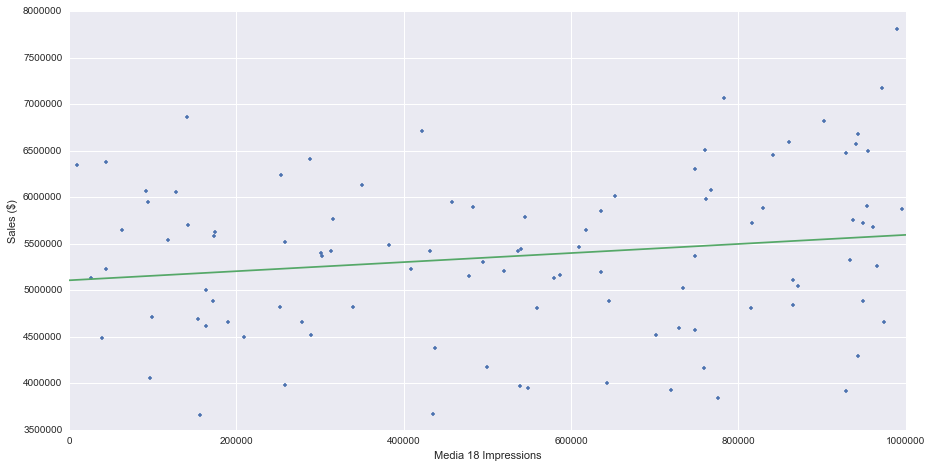

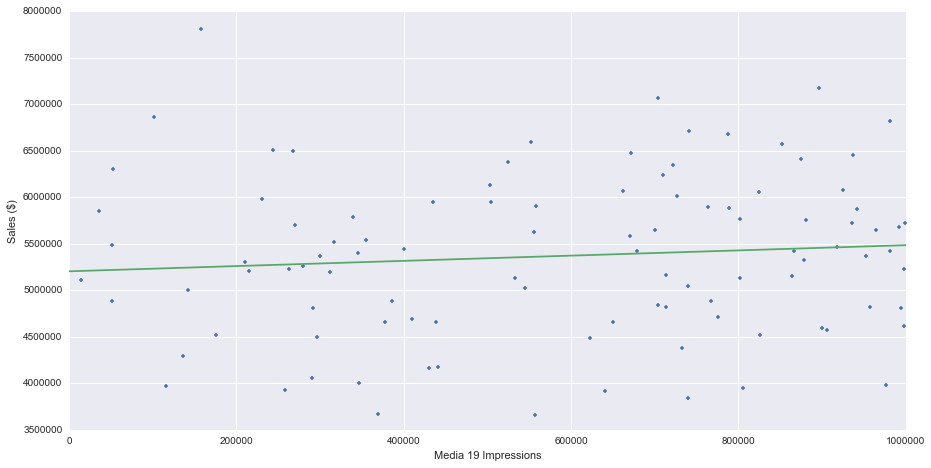

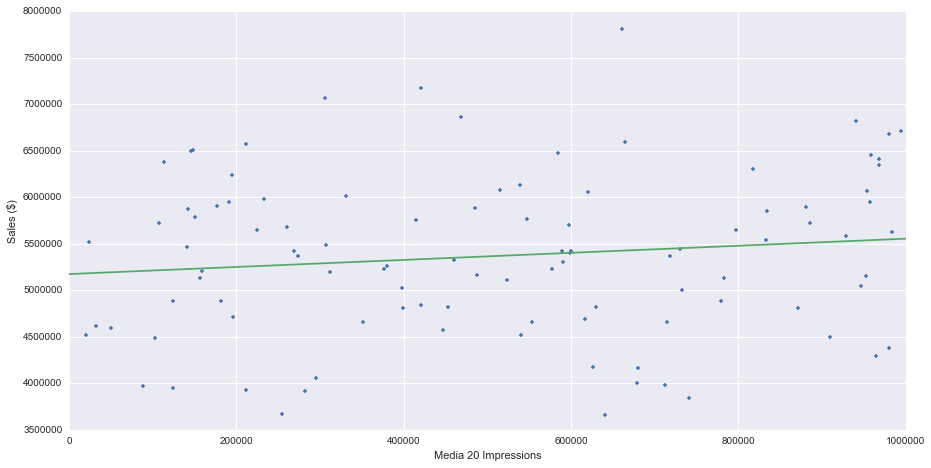

In [10]:
# These instructions can be used to plot the data and the linear fit

for i in range(1,21):
    
    name  = 'Media ' + str(i) + ' Impressions'

    plt.figure(figsize=(15,7.5))
    x = observations[name]
    y = observations['Sales']
    xp = np.linspace(0, 1000000, 100)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    z = np.polyfit(x, y, 1)

    p = np.poly1d(z)
    plt.xlabel(name)
    plt.ylabel('Sales ($)')
    plt.title = name
    plt.plot(x, y, '.', xp, p(xp), '-')

In [25]:
# Estimating the cost of each media impression
for i in range(1,21):
    
    
    name  = 'Media ' + str(i) + ' Impressions'
    name2  = 'Media ' + str(i) + ' Spend'
    x = observations[name]
    y = observations['Sales']
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    
    if p_value < 0.05:
        cost = spend.loc[0,name2]/observations[name].sum()
        print('One impression of Media ' +str(i) + ' costs: ' + str(cost))
        print('The ROI of this media campaign is: ' + str((slope - cost)/cost))
        print
    

One impression of Media 4 costs: 0.0928019518754
The ROI of this media campaign is: 9.22007316147

One impression of Media 9 costs: 0.0588049146997
The ROI of this media campaign is: 17.9696708341

One impression of Media 14 costs: 0.11160761789
The ROI of this media campaign is: 9.0116113087



## For successful media initiatives, every dollar spent yields 9 or more.

The calculated ROI for the three successful media initiatives are 9.2, 17.9 and 9.0. Since these initiatives have such high ROI, it makes sense to reinvest some of the money saved by discountuing all the others into these initiaves. This will be discussed below.


In [21]:
# Calculating the current spending of the three successful media strategies
cost_3_strats = (spend.loc[0,'Media 4 Spend']/1000000 + spend.loc[0,'Media 9 Spend']/1000000 + spend.loc[0,'Media 14 Spend']/1000000)
old_budget = 102
# Decide that the new budget is $50 million. 
new_budget = 50 
leftover = new_budget - cost_3_strats

# Estimating the increased sale for the additional money invested in the three media initiatives
# I share this additional money equally between the three initiatives

extra_sales = 0
for i in range(1,21):
    
    name  = 'Media ' + str(i) + ' Impressions'
    name2  = 'Media ' + str(i) + ' Spend'
    x = observations[name]
    y = observations['Sales']
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    
    
    if p_value < 0.05:
        cost = spend.loc[0,name2]/observations[name].sum()
        sale = leftover/3*slope/cost
        #print sale, leftover/3, cost
        extra_sales = extra_sales + sale
print ('Reinvesting half the advertising budget on media initiaves 4, 9, 14 would bring in $'+str(round(extra_sales,0))+ ' million in extra sales!')

Reinvesting half the advertising budget on media initiaves 4, 9, 14 would bring in $481.0 million in extra sales!


## A new marketing strategy: reduce the advertising budget by half while increasing sales.

Based on our findings, we suggest slashing the advertising budget to \$50 million (a 51% reduction) and invest only on media initiatives 4, 9 and 14. Our calculations show that this should lead to a significant increase in sales. Our model predicts $481 million, which would almost double the company's sales. However, we have to take these results with a pinch of salt, as we are assuming that the more we invest in a certain media initiave, the higher the sales (linear correlation). Probably this assumption will break at some point and the increase in sales might not be as high as the one predicted here. Also we note that we have chosen a new budget of \%50 million quite arbitrarily. The CMO might want to adjust this figure, based on other considerations.

In [26]:
pos = []
neg = []
for i in range(1,11):    
    name3  = 'Structural ' + str(i) + ' Occurrence'
    print(observations.groupby(name3)['Sales'].mean()/1000000)
    ser = observations.groupby(name3)['Sales'].mean() 
    if ser[1] > ser [0]:
        pos.append(name3)
    else:
        neg.append(name3)

print('These are occurrences that have a positive effect on sales:' + str(pos))
print
print('These are occurrences that have a negative effect on sales:' + str(neg))

Structural 1 Occurrence
0    5.203238
1    6.255157
Name: Sales, dtype: float64
Structural 2 Occurrence
0    5.222702
1    6.004039
Name: Sales, dtype: float64
Structural 3 Occurrence
0    5.372328
1    5.349194
Name: Sales, dtype: float64
Structural 4 Occurrence
0    5.407551
1    4.962088
Name: Sales, dtype: float64
Structural 5 Occurrence
0    5.226122
1    6.132157
Name: Sales, dtype: float64
Structural 6 Occurrence
0    5.456805
1    4.811587
Name: Sales, dtype: float64
Structural 7 Occurrence
0    5.296670
1    5.858258
Name: Sales, dtype: float64
Structural 8 Occurrence
0    5.427921
1    5.151241
Name: Sales, dtype: float64
Structural 9 Occurrence
0    5.318937
1    5.738061
Name: Sales, dtype: float64
Structural 10 Occurrence
0    5.310253
1    5.765271
Name: Sales, dtype: float64
These are occurrences that have a positive effect on sales:['Structural 1 Occurrence', 'Structural 2 Occurrence', 'Structural 5 Occurrence', 'Structural 7 Occurrence', 'Structural 9 Occurrence', 'Str

## Structural occurrences do affect sales.

The above analysis shows that structural occurrences do affect sales. For instance, structural occurrence 1 increases weekly sales from \$5.2 to \$6.2 million. We dub these occurrences "*positive structural occurrences*", while those that decrease sales are dubbed "*negative structural occurrences*". We suggest the CMO focuses on how to use positive structural occurrences to their advantage and minimize the effect of negative structural occurrences.

## Model limitations and future work

We have identified two areas where our analysis can be improved and that can be the object of future efforts.

First, in this analysis we used the simplest form of MMM. Indeed, we assumed that the advertsing in one week only affects the sales in that very same week. This is clearly an oversimplification, as customers might react to an advertsing campaign at a later stage. A more accurate model (e.g. an [ad-stock transformation](https://analyticsartist.wordpress.com/2014/08/17/marketing-mix-modeling-explained-with-r/)) would take this effect into account. The code for an ad-stock analysis is reported below. We now find that media initiatives 8, 11, 12, 16 & 18 also contribute to sales. One can therefore use this information to further optimize the spending plan.

Second, the way we predicted additional sales arising from spending more on media initiatives 4, 9 and 14 makes use of some pretty strong assumption (the more impressions, the higher the sales). One might want to refine this model, perhaps by performing some tests, i.e. if I triple spending on media initiative 9, do I really increase sales as much as predicted? Note that we have picked initiative 9 for a reason. Since it is the one with the lowest budget (\$3 million), one can easily triple its budget while minimizing risks.

In [27]:
ar_coeff = .5

#NOTE: .recursive_filter function was only introduced after statsmodels 0.5.0; won’t jive with current anaconda version. You should run ‘conda install statsmodels=0.6.1’ to update the version of statsmodels before attempting the .recursive_filter() function.
for i in range(1,21):
    
    name  = 'Media ' + str(i) + ' Impressions'
    ad_adstock = tsa.filters.filtertools.recursive_filter(observations[name], ar_coeff)
    as_intercept = sm.add_constant(ad_adstock)
    modelfit1 = sm.OLS(observations['Sales'], as_intercept)
    results1 = modelfit1.fit()
    print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9152
Date:                Wed, 04 Nov 2015   Prob (F-statistic):              0.341
Time:                        10:17:16   Log-Likelihood:                -1538.2
No. Observations:                 102   AIC:                             3080.
Df Residuals:                     100   BIC:                             3086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                5.104e+06   2

References

http://www.andrewwalterowens.com/post/111019666926/marketing-mix-modeling-using-statsmodels-part-1

https://analyticsartist.wordpress.com/2014/08/17/marketing-mix-modeling-explained-with-r/

https://analyticsartist.wordpress.com/2013/11/02/calculating-adstock-effect/